## SHUBHAM SHARMA
### IIT BOMBAY
This code is to get familiar with the dataset that we are using for volumetric segmentation. We'll go through the heart and spleen dataset here and will try to understand their shape and other features.

**Let us first see the cardiac data**

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Importing the libraries
import matplotlib.pyplot as plt
import numpy as np
# # Set numpy to print only 2 decimal digits for neatness
# np.set_printoptions(precision=2, suppress=True)

import os
import nibabel as nib
from scipy import ndimage as nd
from tqdm import tqdm

%matplotlib inline

In [0]:
path2images='gdrive/My Drive/data_phase1/Heart/imagesTr/'
path2labels='gdrive/My Drive/data_phase1/Heart/labelsTr/'
list_of_images=os.listdir(path2images)
list_of_labels=os.listdir(path2labels)
print('Files in training:',list_of_images)
print('Files in testing',list_of_labels)
################################
print(len(list_of_images))
print(len(list_of_labels))
################################

Files in training: ['._la_029.nii.gz', 'la_003.nii.gz', 'la_004.nii.gz', 'la_005.nii.gz', 'la_007.nii.gz', 'la_009.nii.gz', 'la_010.nii.gz', 'la_011.nii.gz', 'la_014.nii.gz', 'la_016.nii.gz', 'la_017.nii.gz', 'la_018.nii.gz', 'la_019.nii.gz', 'la_020.nii.gz', 'la_021.nii.gz', 'la_022.nii.gz', 'la_023.nii.gz', 'la_024.nii.gz', 'la_026.nii.gz', 'la_029.nii.gz', 'la_030.nii.gz']
Files in testing ['._la_014.nii.gz', 'la_003.nii.gz', 'la_005.nii.gz', 'la_004.nii.gz', '._la_029.nii.gz', 'la_007.nii.gz', 'la_016.nii.gz', 'la_009.nii.gz', 'la_011.nii.gz', 'la_014.nii.gz', 'la_010.nii.gz', 'la_019.nii.gz', 'la_018.nii.gz', 'la_017.nii.gz', 'la_021.nii.gz', 'la_020.nii.gz', 'la_022.nii.gz', 'la_024.nii.gz', 'la_026.nii.gz', 'la_023.nii.gz', 'la_029.nii.gz', 'la_030.nii.gz']
21
22


In [0]:
for i in range(len(list_of_images)):
  if list_of_images[i][0]!='.':
    x=list_of_images[i]
    img = nib.load(path2images+x)
    img_data = img.get_fdata()
    print('The shape of',x , ' data is',img_data.shape,'minimum is',np.min(img_data),'and maximum is',np.max(img_data))

The shape of la_003.nii.gz  data is (320, 320, 130) minimum is 0.0 and maximum is 1999.0
The shape of la_004.nii.gz  data is (320, 320, 110) minimum is 0.0 and maximum is 1811.0
The shape of la_005.nii.gz  data is (320, 320, 120) minimum is 0.0 and maximum is 1888.0
The shape of la_007.nii.gz  data is (320, 320, 130) minimum is 0.0 and maximum is 1873.0
The shape of la_009.nii.gz  data is (320, 320, 100) minimum is 0.0 and maximum is 2171.0
The shape of la_010.nii.gz  data is (320, 320, 120) minimum is 0.0 and maximum is 1907.0
The shape of la_011.nii.gz  data is (320, 320, 120) minimum is 0.0 and maximum is 1979.0
The shape of la_014.nii.gz  data is (320, 320, 120) minimum is 0.0 and maximum is 2058.0
The shape of la_016.nii.gz  data is (320, 320, 90) minimum is 0.0 and maximum is 2017.0
The shape of la_017.nii.gz  data is (320, 320, 120) minimum is 0.0 and maximum is 1937.0
The shape of la_018.nii.gz  data is (320, 320, 122) minimum is 0.0 and maximum is 2095.0
The shape of la_019.ni

There are 20 training images and 10 testing images in the cardiac data

Text(0.5, 0.98, 'Center slices for image')

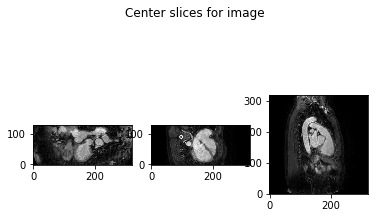

In [0]:

#Let us plot any of the image and its corresponding label images
epi_img = nib.load(path2images+'la_003.nii.gz')
epi_img_data = epi_img.get_fdata()
epi_img_data.shape

def show_slices(slices):
# Function to display row of image slices
  fig, axes = plt.subplots(1, len(slices))
  for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, cmap="gray", origin="lower")
    
slice_0 = epi_img_data[160, :, :]
slice_1 = epi_img_data[:, 160, :]
slice_2 = epi_img_data[:, :, 65]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for image")  

In [0]:
epi_img = nib.load(path2labels+'la_003.nii.gz')
epi_img_data = epi_img.get_fdata()
print('The shape of the image is:',epi_img_data.shape)

    
slice_0 = epi_img_data[160, :, :]
slice_1 = epi_img_data[:, 160, :]
slice_2 = epi_img_data[:, :, 65]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for image")  # doctest: +SKIP
print(np.sum(slice_1))

In [0]:
#Function idea taken from https://stackoverflow.com/questions/18386302/resizing-a-3d-image-and-resampling

# a = nib.load(path2images+'la_003.nii.gz') # nib is what I use to load the images
# b = (128,128,128)


def resize_image(a,b):
  '''a is the image and b is the target size eg(320,320,128)'''

  flash = a.get_data() # Access data as array (in this case memmap)

  dsfactor = [w/float(f) for w,f in zip(b, flash.shape)]
  downed = nd.interpolation.zoom(flash, zoom=dsfactor)
  return downed

Text(0.5, 0.98, 'Center slices for image')

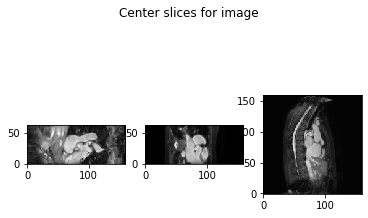

In [0]:
# a = nib.load(path2images+'la_003.nii.gz') # nib is what I use to load the images
a = nib.load(path2images+'la_016.nii.gz') # nib is what I use to load the images
# b = nib.load(path2images+'la_005.nii.gz')
b=(160 , 160, 64)

downed=resize_image(a,b)
#Let us check this function:
slice_0 = downed[80, :, :]
slice_1 = downed[:, 80, :]
slice_2 = downed[:, :, 32]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for image")  # doctest: +SKIP

Text(0.5, 0.98, 'Center slices for image')

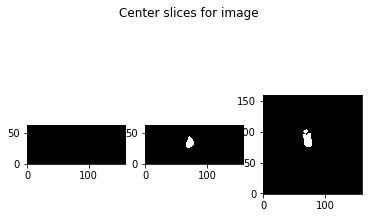

In [0]:
a = nib.load(path2labels+'la_003.nii.gz') # nib is what I use to load the images
b=(160 , 160, 64)

downed=resize_image(a,b)
#Let us check this function:
slice_0 = downed[80, :, :]
slice_1 = downed[:, 80, :]
slice_2 = downed[:, :, 32]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for image") 

#### Now that we have seen that the function is running fine, let us convert every image in the format we want it to be and save it in .npy format

In [0]:
b = (160 , 160, 64)
#converting every image to (160 , 160, 64)
c=0
for i in tqdm(range(len(list_of_images))):
  if list_of_images[i][0]!='.':
    
    l=list_of_images[i]
    img_X = nib.load(path2images+l)
    downed_X=resize_image(img_X,b)
    temp_X=np.reshape(downed_X,(1,downed_X.shape[0],downed_X.shape[1],downed_X.shape[2]))
    
    img_Y = nib.load(path2labels+l)
    downed_Y=resize_image(img_Y,b)
    temp_Y=np.reshape(downed_Y,(1,downed_Y.shape[0],downed_Y.shape[1],downed_Y.shape[2]))
    
    if c==0:
      X=temp_X
      Y=temp_Y
    else:
      X=np.concatenate((X, temp_X), axis=0)
      Y=np.concatenate((Y, temp_Y), axis=0)
    c+=1

100%|██████████| 21/21 [01:36<00:00,  5.50s/it]


(20, 160, 160, 64)
(20, 160, 160, 64)


Text(0.5, 0.98, 'Center slices for image')

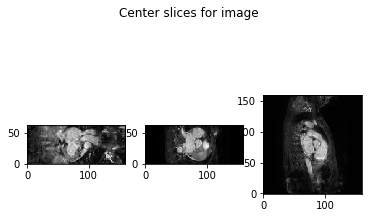

In [0]:
print(X.shape)
print(Y.shape)

downed=X[1]
#Let us check this function:
slice_0 = downed[80, :, :]
slice_1 = downed[:, 80, :]
slice_2 = downed[:, :, 32]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for image") 

Text(0.5, 0.98, 'Center slices for image')

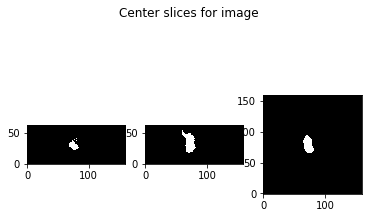

In [0]:
downed=Y[1]
#Let us check this function:
slice_0 = downed[80, :, :]
slice_1 = downed[:, 80, :]
slice_2 = downed[:, :, 32]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for image") 

In [0]:
np.save('gdrive/My Drive/Phase 1 Project/X_cardiac_type2.npy',X)
np.save('gdrive/My Drive/Phase 1 Project/Y_cardiac_type2.npy',Y)


In [0]:
# Y=np.load('gdrive/My Drive/Phase 1 Project/Y_cardiac.npy')

In [0]:
# Y.shape

(20, 320, 320, 128)

In [0]:
#Function to create label array for binary classification
def binarylab(labels):
    
    #Define an Empty Array 
    x = np.zeros([length,width,height,classes],dtype="uint8")
    
    #Read Each pixel label and put it into corresponding label plane
    for i in range(length):
      for j in range(width):
        for k in range(height): 
          x[i,j,k,labels[i][j][k]]=1
    
    return x

In [0]:
length,width,height,classes=160, 160 ,64 ,2
data_shape = length*width*height
z= binarylab(Y[0])

In [0]:
z.shape

(160, 160, 64, 2)

Text(0.5, 0.98, 'Center slices for image')

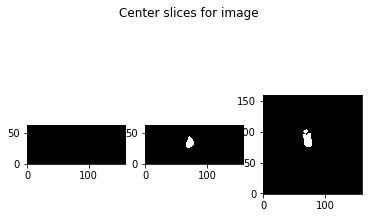

In [0]:
downed=Y[3]
#Let us check this function:
slice_0 = downed[160, :, :]
slice_1 = downed[:, 160, :]
slice_2 = downed[:, :, 60]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for image") 

Text(0.5, 0.98, 'Center slices for image')

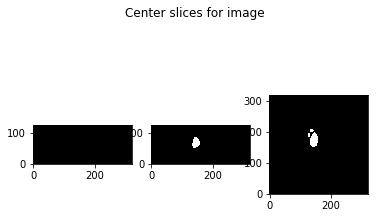

In [0]:
downed=z[:,:,:,1]
#Let us check this function:
slice_0 = downed[160, :, :]
slice_1 = downed[:, 160, :]
slice_2 = downed[:, :, 60]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for image") 

In [0]:
length,width,height,classes = 160, 160 ,64 ,2
data_shape = length*width*height
c=0
for i in tqdm(range(Y.shape[0])):
  temp1 = binarylab(Y[i])
  temp2 = np.reshape(temp1,(1,data_shape,2))
  if c==0:
    Y_categorical=temp2
  else:
    Y_categorical=np.concatenate((Y_categorical, temp2), axis=0)
  c+=1
    
  

100%|██████████| 20/20 [00:23<00:00,  1.20s/it]


In [0]:
Y_categorical.shape

(20, 1638400, 2)

In [0]:
t=Y_categorical[3]
t=t[:,1]
t=t.reshape(length,width,height)
slice_0 = t[160, :, :]
slice_1 = t[:, 160, :]
slice_2 = t[:, :, 60]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for image") 

In [0]:
np.save('gdrive/My Drive/Phase 1 Project/Y_cardiac_categorical_type2.npy',Y_categorical)